In [92]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
import calmap

from tensorflow.keras.layers import Input, Dense, Activation, LeakyReLU
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import backend

import warnings
warnings.filterwarnings('ignore')

import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

%matplotlib inline

In [56]:
# Fetching dataset

df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# Depricated
# df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [57]:
# new dataset 
df_covid19.head(2)

Country_Region          Last_Update      Lat     Long_  Confirmed  Deaths  \
0      Australia  2020-04-05 00:51:28 -25.0000  133.0000       5550      30   
1        Austria  2020-04-05 00:44:37  47.5162   14.5501      11781     186   

   Recovered  Active  
0        701    4819  
1       2507    9088

In [58]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_covid19["Active"] = df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"]
# df_recovered = df_recovered.rename(columns={"Province/State":"state","Country/Region": "country"})

In [59]:
# Changing the conuntry names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_covid19.loc[df_covid19['country'] == "US", "country"] = "USA"
df_table.loc[df_table['Country_Region'] == "US", "Country_Region"] = "USA"
# df_recovered.loc[df_recovered['country'] == "US", "country"] = "USA"


df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_covid19.loc[df_covid19['country'] == "Korea, South", "country"] = "South Korea"
df_table.loc[df_table['Country_Region'] == "Korea, South", "Country_Region"] = "South Korea"
# df_recovered.loc[df_recovered['country'] == 'Korea, South', "country"] = 'South Korea'

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_covid19.loc[df_covid19['country'] == "Taiwan*", "country"] = "Taiwan"
df_table.loc[df_table['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"
# df_recovered.loc[df_recovered['country'] == 'Taiwan*', "country"] = 'Taiwan'

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"
# df_recovered.loc[df_recovered['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_table.loc[df_table['Country_Region'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"
# df_recovered.loc[df_recovered['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_covid19.loc[df_covid19['country'] == "Reunion", "country"] = "Réunion"
df_table.loc[df_table['Country_Region'] == "Reunion", "Country_Region"] = "Réunion"
# df_recovered.loc[df_recovered['country'] == "Reunion", "country"] = "Réunion"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"
# df_recovered.loc[df_recovered['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_covid19.loc[df_covid19['country'] == "Bahamas, The", "country"] = "Bahamas"
df_table.loc[df_table['Country_Region'] == "Bahamas, The", "Country_Region"] = "Bahamas"
# df_recovered.loc[df_recovered['country'] == 'Bahamas, The', "country"] = 'Bahamas'

df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_covid19.loc[df_covid19['country'] == "Gambia, The", "country"] = "Gambia"
df_table.loc[df_table['Country_Region'] == "Gambia", "Country_Region"] = "Gambia"
# df_recovered.loc[df_recovered['country'] == 'Gambia, The', "country"] = 'Gambia'

# getting all countries
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting Continent Information
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["Country_Region"].values])
# df_recovered.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]] )   

In [60]:
df_table = df_table[df_table["continent"] != "Others"]
df_deaths[df_deaths["continent" ]== 'Others']

state             country continent        Lat        Long  1/22/20  \
88    NaN    Diamond Princess    Others   0.000000    0.000000        0   
127   NaN            Holy See    Others  41.902900   12.453400        0   
236   NaN         Timor-Leste    Others  -8.874217  125.727539        0   
241   NaN  West Bank and Gaza    Others  31.952200   35.233200        0   
247   NaN              Kosovo    Others  42.602636   20.902977        0   
248   NaN               Burma    Others  21.916200   95.956000        0   
252   NaN          MS Zaandam    Others   0.000000    0.000000        0   

     1/23/20  1/24/20  1/25/20  1/26/20  ...  3/26/20  3/27/20  3/28/20  \
88         0        0        0        0  ...       10       10       10   
127        0        0        0        0  ...        0        0        0   
236        0        0        0        0  ...        0        0        0   
241        0        0        0        0  ...        1        1        1   
247        0        0        0        0  ...        1        1        1   
248        0        0        0        0  ...        0        0        0   
252        0        0        0        0  ...        0        0        0   

     3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  
88        10       10       10      11      11      11      11  
127        0        0        0       0       0       0       0  
236        0        0        0       0       0       0       0  
241        1        1        1       1       1       1       1  
247        1        1        1       1       1       1       1  
248        0        0        1       1       1       1       1  
252        0        0        0       2       2       2       2  

[7 rows x 79 columns]

In [61]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

In [51]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days


out = ""#+"output/"

# General Analysis of Data
<hr>
Getting country wise and continent wise data.

In [62]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','continent','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)

df_continents_cases = df_covid19.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)
df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

### Global Reported Cases till Date
Total number of confirmed cases, deaths reported, revoveries and active cases all across the world

In [63]:
df_t = pd.DataFrame(pd.to_numeric(df_countries_cases.sum()),dtype=np.float64).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["Deaths"]/df_t["Confirmed"],2)
df_t.style.background_gradient(cmap='Wistia',axis=1).format("{:.0f}",subset=["Confirmed"])

### Coninent Wise Reported Cases 
Coninent Wise reported confirmed cases, recovered cases, deaths, active cases

In [64]:
df_continents_cases["Mortality Rate (per 100)"] = np.round(100*df_continents_cases["Deaths"]/df_continents_cases["Confirmed"],2)
df_continents_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])

### Country Wise Reported Cases
Country Wise reported confirmed cases, recovered cases, deaths, active cases

In [65]:
# df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Wistia')
df_countries_cases["Mortality Rate (per 100)"] = np.round(100*df_countries_cases["Deaths"]/df_countries_cases["Confirmed"],2)
df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])

### Top 10 countries (Confirmed Cases and Deaths)

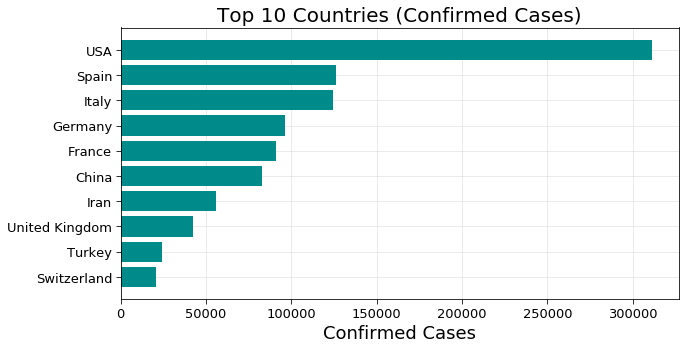

In [66]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig(out+'Top 10 Countries (Confirmed Cases).png')

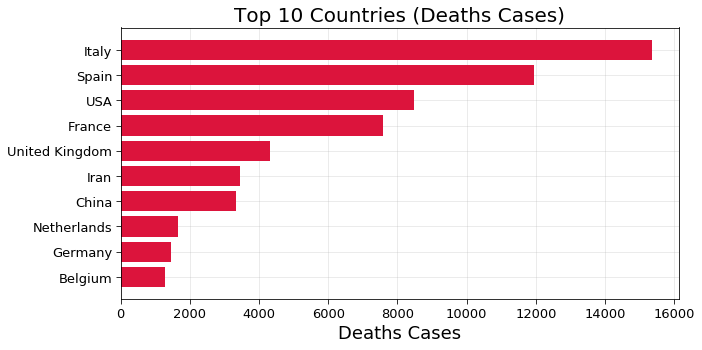

In [67]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
plt.savefig(out+'Top 10 Countries (Deaths Cases).png')

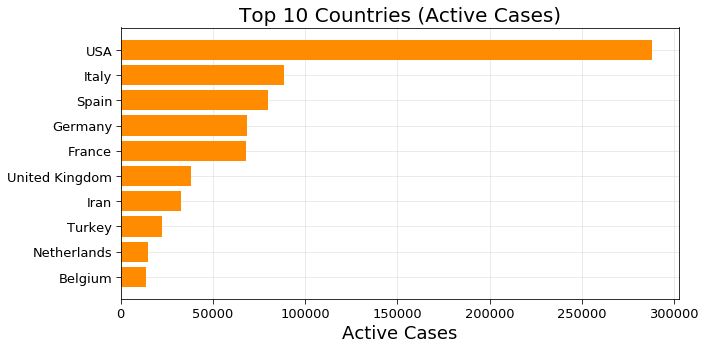

In [68]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Active')["Active"].index[-10:],df_countries_cases.sort_values('Active')["Active"].values[-10:],color="darkorange")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("Top 10 Countries (Active Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
plt.savefig(out+'Top 10 Countries (Active Cases).png')

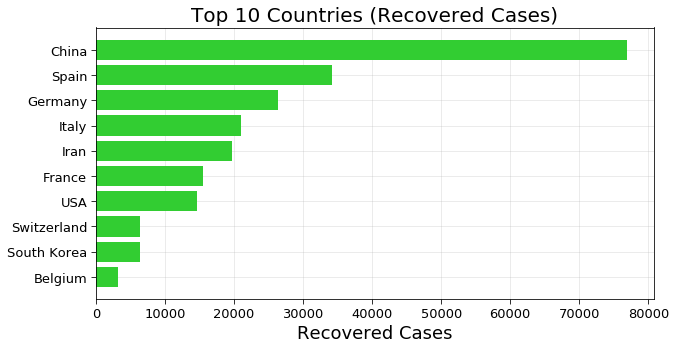

In [69]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')["Recovered"].index[-10:],df_countries_cases.sort_values('Recovered')["Recovered"].values[-10:],color="limegreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
plt.savefig(out+'Top 10 Countries (Recovered Cases).png')

# Calander Map
<hr>

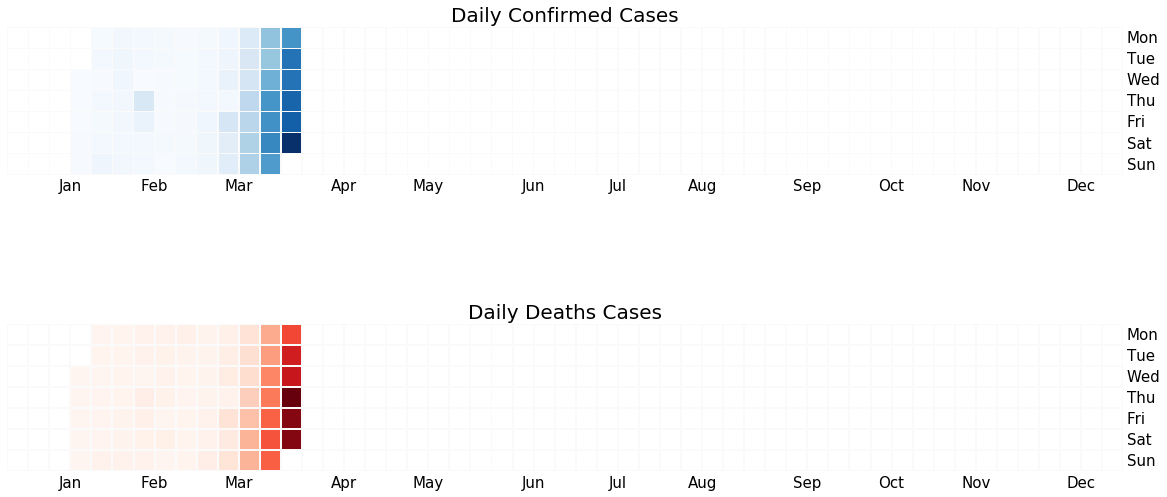

In [70]:
f = plt.figure(figsize=(20,10))
f.add_subplot(2,1,1)
calmap.yearplot(df_table.groupby('Last_Update')['Confirmed'].sum().diff(), fillcolor='white', cmap='Blues', linewidth=0.5,linecolor="#fafafa",year=2020,)
plt.title("Daily Confirmed Cases",fontsize=20)
plt.tick_params(labelsize=15)

f.add_subplot(2,1,2)
calmap.yearplot(df_table.groupby('Last_Update')['Deaths'].sum().diff(), fillcolor='white', cmap='Reds', linewidth=1,linecolor="#fafafa",year=2020,)
plt.title("Daily Deaths Cases",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

# Correlation Analysis
<hr>
Plotting Heat map of correlation of confirmed cases, recovered cases, deaths and active cases.

### Country wise Correlation

In [71]:
df_countries_cases.iloc[:,:-1].corr().style.background_gradient(cmap='Reds')

### Continent Wise Correlation

In [72]:
df_continents_cases.iloc[:,:-1].corr().style.background_gradient(cmap='Reds')

# Visualization on Map
<hr>

In [73]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

# Global Confirmed Cases Heat Map 
<hr>

In [74]:
temp_df = pd.DataFrame(df_countries_cases['Confirmed'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Confirmed"]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Confirmed"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Confirmed Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Confirmed Cases(Log Scale)",colorscale="Blues")
# fig.to_image("Global Heat Map confirmed.png")
fig.show()

## Global Deaths Heat Map 
<hr>

In [75]:
temp_df = pd.DataFrame(df_countries_cases['Deaths'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Deaths"]+1), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Deaths"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Deaths Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Deaths (Log Scale)",colorscale="Reds")
# fig.to_image("Global Heat Map deaths.png")
fig.show()

## Global Recovered Heat Map 
<hr>

In [76]:
temp_df = pd.DataFrame(df_countries_cases['Recovered'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df.iloc[:,-1]+1), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Recovered"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Recovered Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Recovered",colorscale="Greens")
# fig.to_image("Global Heat Map deaths.png")
fig.show()

## COVID-19: Spread Progression

In [77]:
df_data = df_table.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths'].max().reset_index()
df_data["Last_Update"] = pd.to_datetime( df_data["Last_Update"]).dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(df_data, locations="Country_Region", locationmode='country names', 
                     color=np.power(df_data["Confirmed"],0.3)-2 , size= np.power(df_data["Confirmed"]+1,0.3)-1, hover_name="Country_Region",
                     hover_data=["Confirmed"],
                     range_color= [0, max(np.power(df_data["Confirmed"],0.3))], 
                     projection="natural earth", animation_frame="Last_Update", 
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='COVID-19: Progression of spread'
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.show()

# COVID-19 Spread Analysis
<hr>

Spread Analysis is in two sections 
1. Spread Across Globe
2. Spread Trends in the World, Continents and few most affected Countries

## 1. Spread Across Globe 
<hr> 
### Number of countries affected over the time

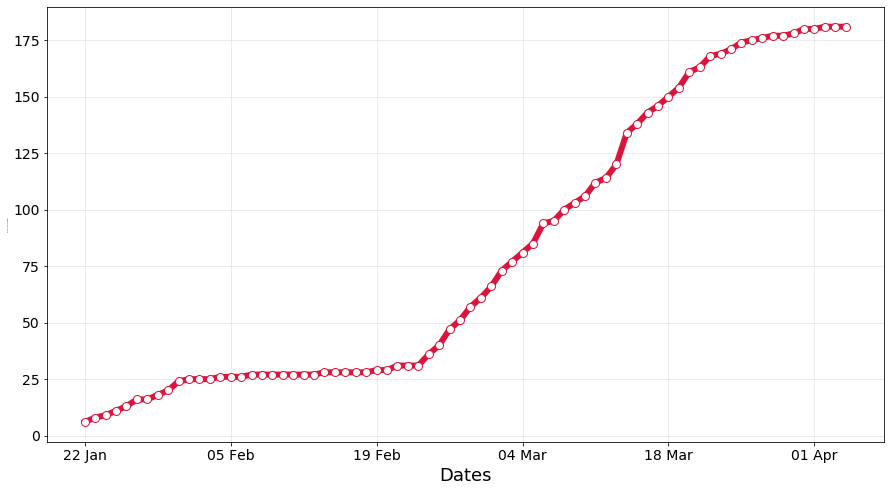

In [78]:
case_nums_country = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=6, linestyle='-', marker='o',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=1)
plt.grid(alpha = 0.3)

plt.savefig(out+'spread.png')
plt.show()
plt.close()

##  2. Spread Trends in the World, Continents and few most affected Countries
<hr>
1. COVID-19 Global Spread Trends
2. COVID-19 Spread Trends in Different Continents
3. COVID-19 Spread Trends in Few Most Affected Countries
4. COVID-19 Spread Comparison of few most affected countries
5. COVID-19 Spread Comparison of in different continents


### 1. COVID-19 Global Spread Trends
<h>
This graph shows the confirmed, deaths, recovered and active caes trends over the world.


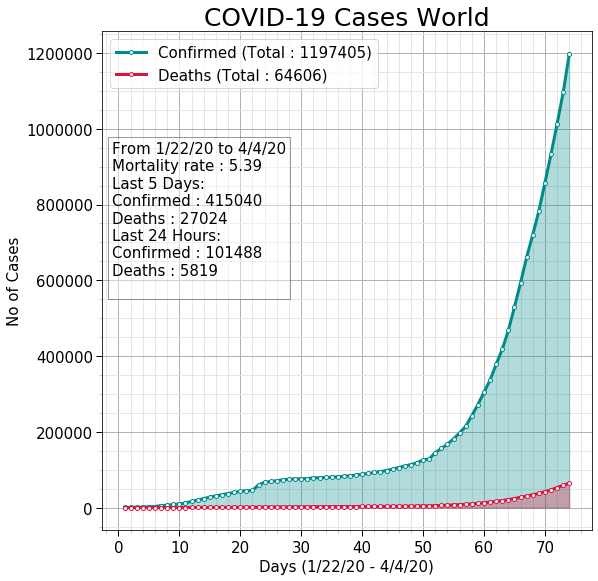

In [79]:
cols = 1
rows = 1
f = plt.figure(figsize=(10,10*rows))

visualize_covid_cases(df_confirmed, df_deaths,continent = "All",figure = [f,rows,cols, 1])

plt.savefig(out+'COIVD-19-World.png')
plt.show()

### 2 . COVID-19 Spread Trends in Different Continents

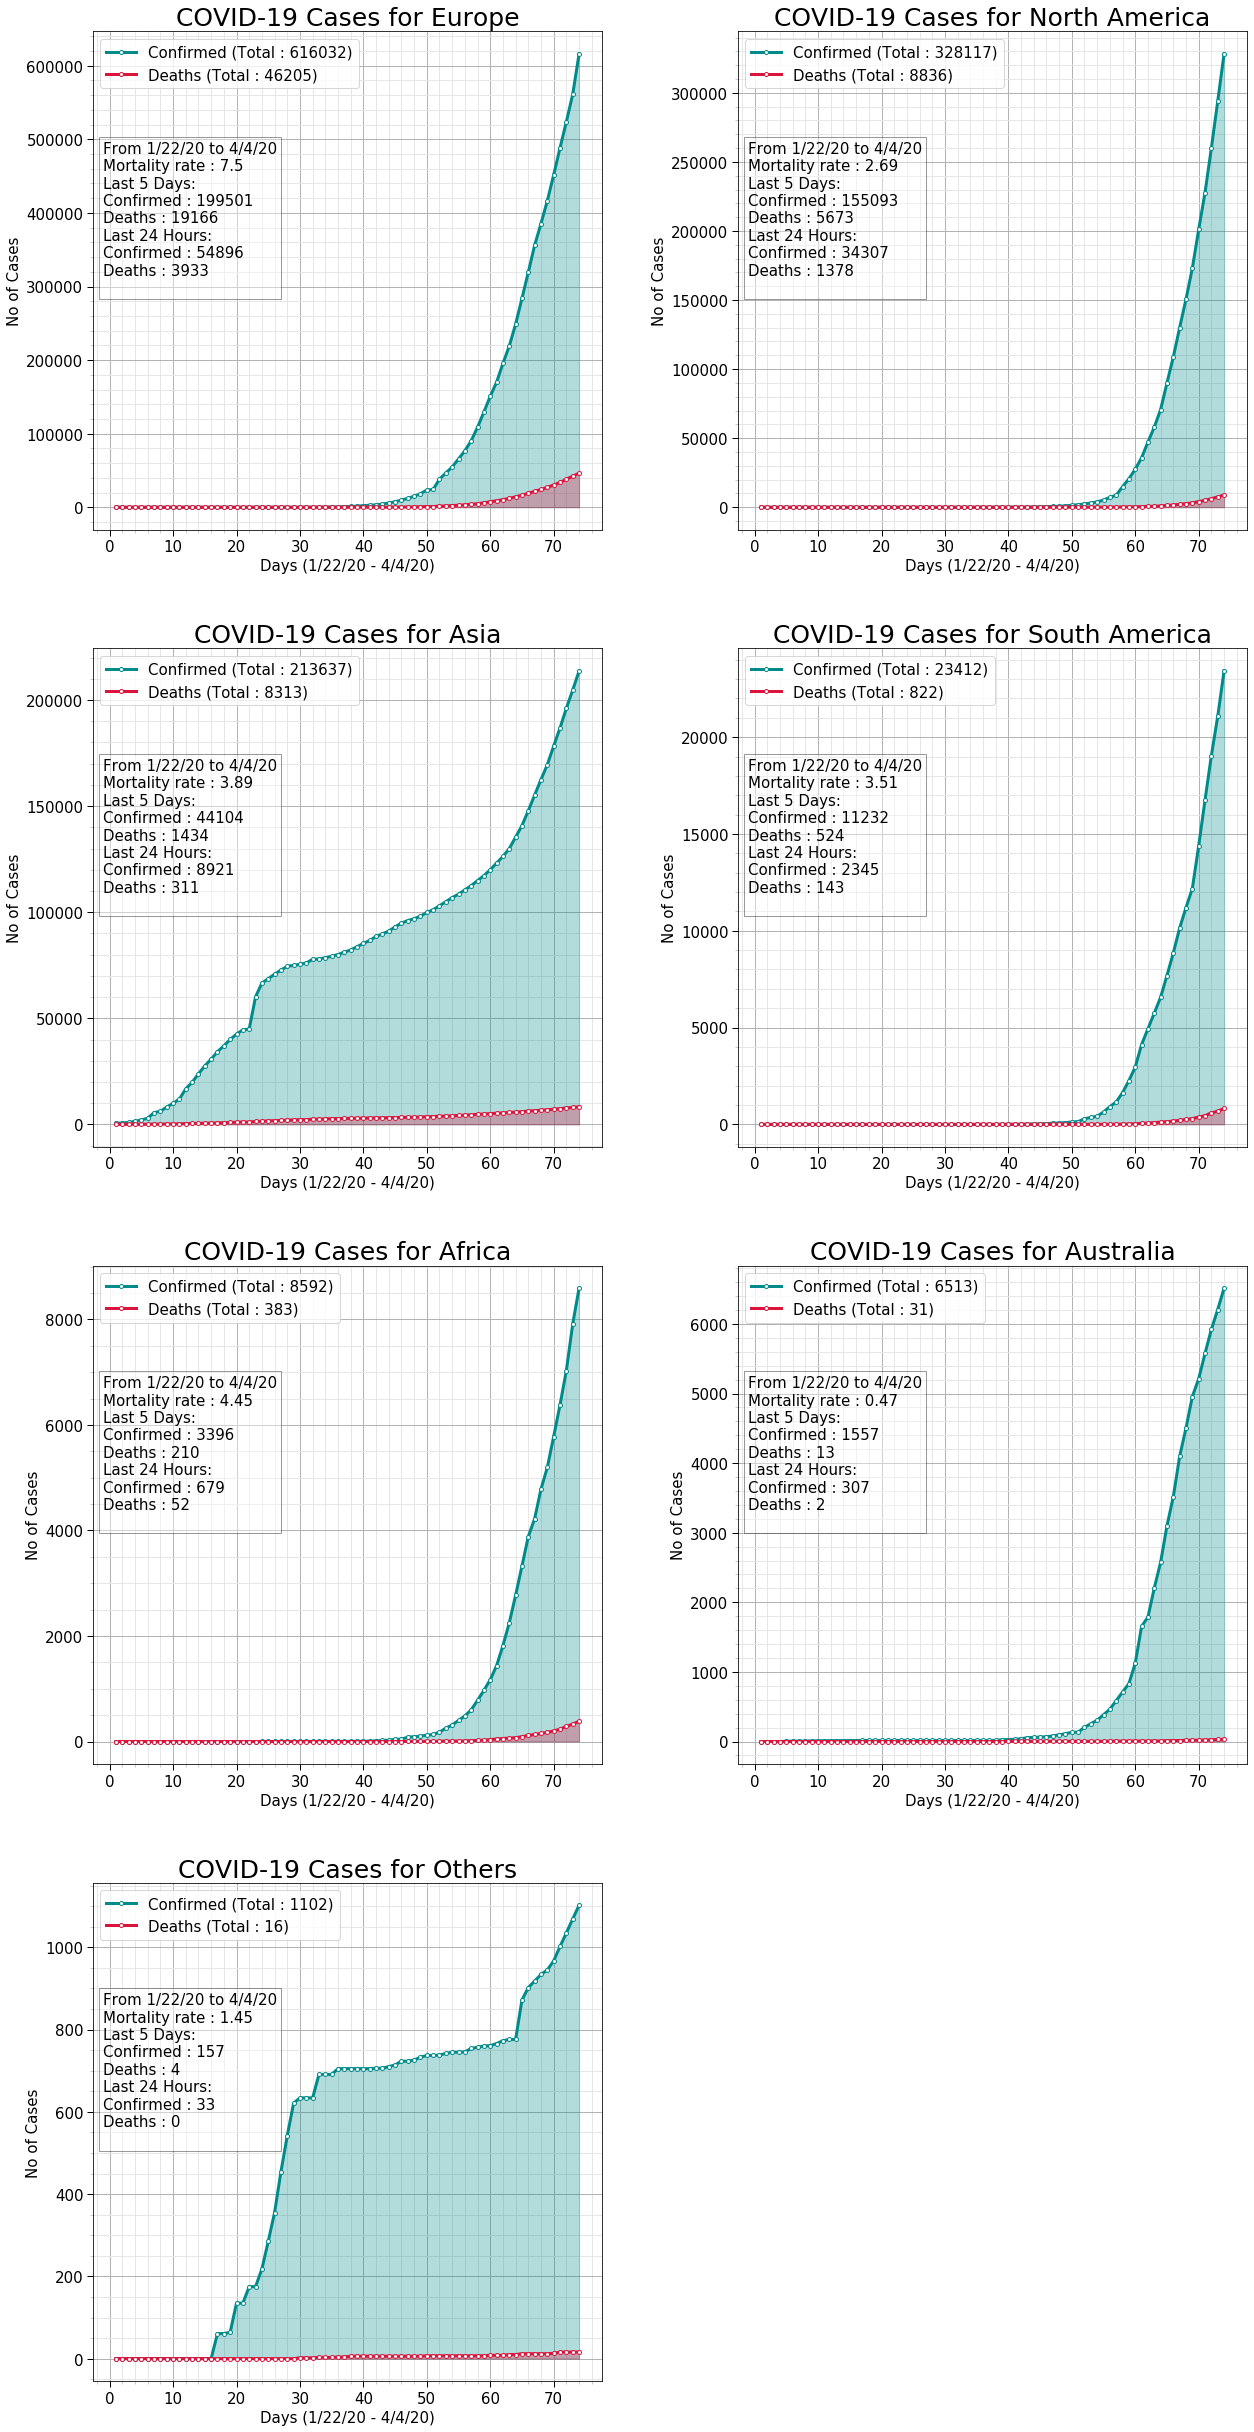

In [80]:
df_continents= df_confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index

cols =2
rows = int(np.ceil(continents.shape[0]/cols))
f = plt.figure(figsize=(20,9*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases(df_confirmed, df_deaths, continent = continent,figure = [f,rows,cols, i+1])

plt.show()

### 4. COVID-19 Spread Comparison of few most affected countries and INDIA

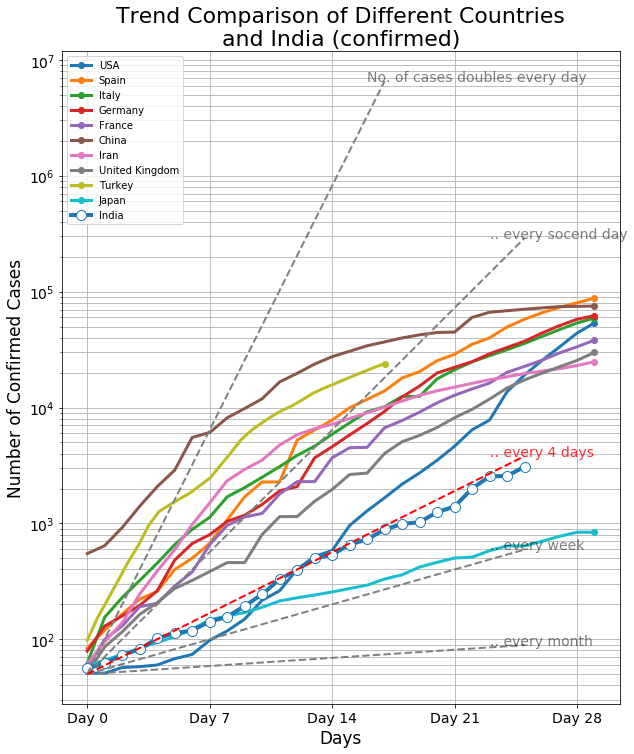

In [81]:
temp = df_confirmed.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 9:
        if country != "India" and country != "Japan" :
            continue
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    if country != "India":
        plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])
    else:
        marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
        plt.plot(date,t,"-.",label = country,**marker_style)

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)


# India is following trend similar to doulbe the cases in 4 days but it may increase the rate 
x = np.arange(0,26)
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "Red")
plt.annotate(".. every 4 days",(x[-3],y[-1]),color="Red",xycoords="data",fontsize=14,alpha = 0.8)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparison of Different Countries\n and India (confirmed) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.savefig(out+'Trend Comparison with India (confirmed).png')
plt.show()

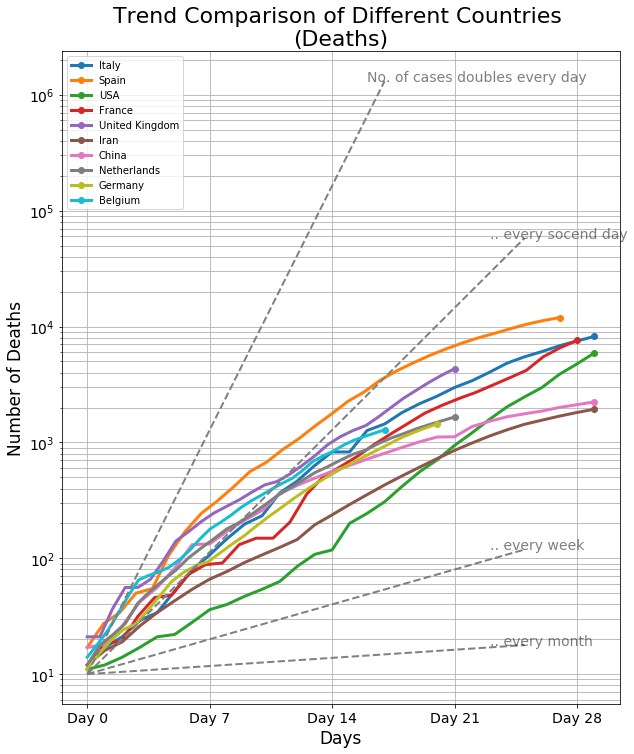

In [82]:
temp = df_deaths.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)

threshold = 10
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 10:
        break
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])


plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("Trend Comparison of Different Countries \n(Deaths)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.savefig(out+'Trend Comparison countries deaths.png')
plt.show()

### 5. COVID-19 Spread Comparison of in different continents

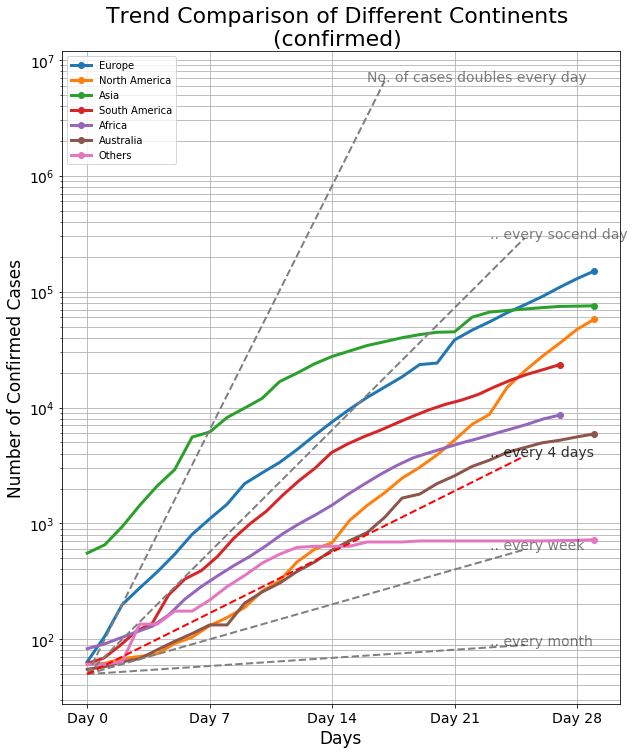

In [83]:
temp = df_confirmed.groupby('continent').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 10:
        break
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)


# India is following trend similar to doulbe the cases in 4 days but it may increase the rate 
x = np.arange(0,26)
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "Red")
plt.annotate(".. every 4 days",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.8)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparison of Different Continents \n(confirmed) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.savefig(out+'Trend Comparison of continents (Confirmed).png')
plt.show()

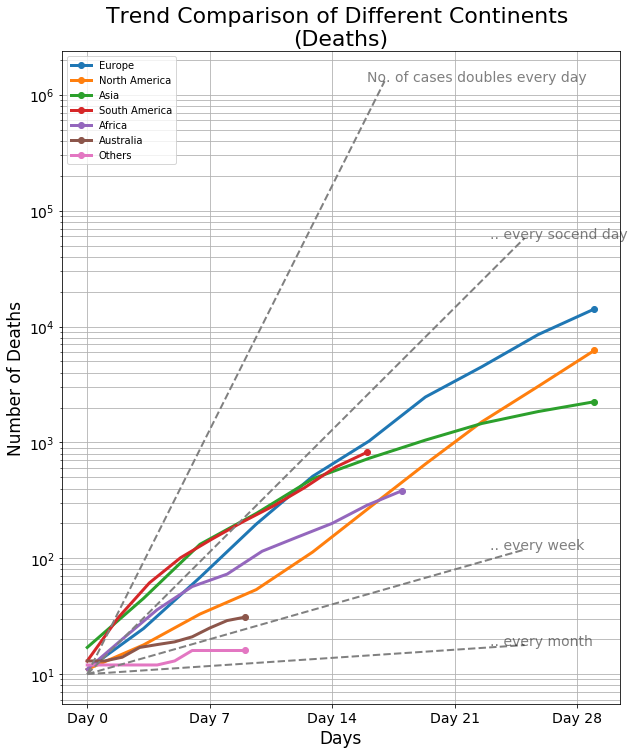

In [84]:
temp = df_deaths.groupby('continent').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)

threshold = 10
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 10:
        break
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 10)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])


plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("Trend Comparison of Different Continents \n(Deaths)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.savefig(out+'Trend Comparison continents (deaths).png')
plt.show()

# Global Prediction
<hr>

## Global Trend: 
It is useful to understand the global trend of an increase in the number of cases over time. There is always a pattern in any data, but the concern is how strongly data follows a pattern. COVID-19 spreads exponentially, positive cases of COVID-19 takes 67 days to reach 1 Lakhs while it takes only 11 days to reach 2 Lakhs, 4 days to reach 3 Lakhs, and just 2 days to reach 5 Lakhs. This trend shows how fast it spreads.
<br><br>
**Note: This prediction is only based on the current spread trend, and no other factor is included, so this trend may vary a lot. Also, at some point in time, the testing capacity will become the limiting factor, so it may affect the actual figure a lot. This is to estimate the possible values that could reach with the consideration of any measures taken by different countries to control the spread.**  

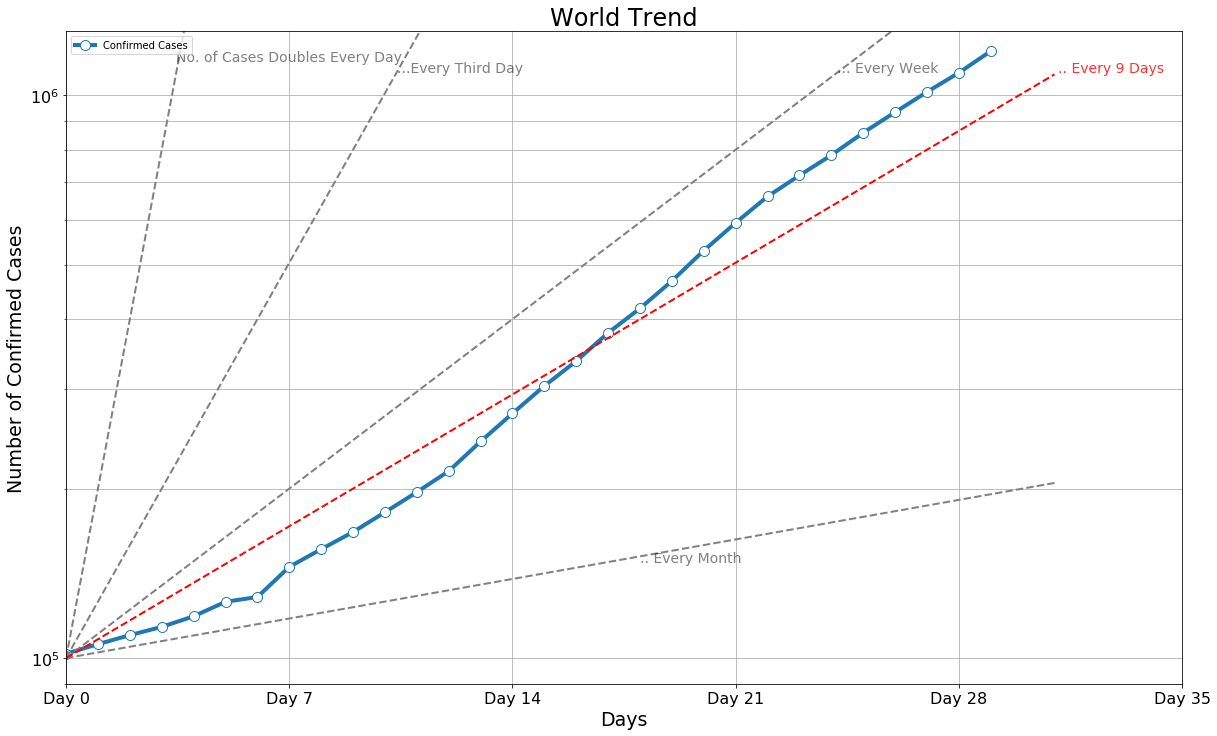

In [85]:
temp_data = df_confirmed.iloc[:,5:].sum(axis =0)
f = plt.figure(figsize=(20,12))
f.add_subplot(111)

threshold = 100000

t = temp_data.values
t = t[t >threshold]

date = np.arange(0,len(t[:]))
xnew = np.linspace(date.min(), date.max(), 10)
spl = make_interp_spline(date, t, k=1)  # type: BSpline
power_smooth = spl(xnew)

marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
plt.plot(date,t,"-.",label="Confirmed Cases",**marker_style)


# Reference lines 
x = np.arange(0,32)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of Cases Doubles Every Day",(np.log2((t.max()-threshold)/threshold),t.max()-threshold/2),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,32)
y = 2**(x/3+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("...Every Third Day",(np.log2((t.max()-threshold)/threshold)*3,t.max()-threshold),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,32)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("... Every Week",(np.log2((t.max()-threshold)/threshold)*7,t.max()-threshold),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,32)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. Every Month",(18,2**(17/30+np.log2(threshold))),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,32)
y = 2**(x/9+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "Red")
plt.annotate(".. Every 9 Days",(np.log2((t.max()-threshold)/threshold)*9,t.max()-threshold),color="Red",xycoords="data",fontsize=14,alpha = 0.8)


plt.xlim(date[0],date[-1])
plt.ylim(threshold - threshold/10,t.max()+threshold)
# plot Params
# plt.tight_layout()
plt.tick_params(labelsize = 16)        
plt.xticks(np.arange(0,len(t[:])+7,7),[ "Day "+str(i) for i in range(len(t[:])+7)][::7]) 
plt.xlabel("Days",fontsize=19)
plt.ylabel("Number of Confirmed Cases",fontsize=19)
plt.title("World Trend",fontsize=24)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.savefig(out+"World Trend Confirmed cases.png")
plt.show()

## Prediction Curve for Global Confirmed Cases
Buliding Model

In [93]:
Visible = Input(shape=(1,))
Dense_l1 = Dense(80,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)
Dense_l2 = Dense(80,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)
Dense_l3 = Dense(1,name="Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "Output")(Dense_l3)
model = models.Model(inputs=Visible, outputs=LRelu_l3)
model.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 1)                 81        
_________________________________________________________________
Output (LeakyReLU)           (None, 1)                 0     

In [94]:
data_y = np.log10(np.asarray(df_confirmed.sum()[5:]).astype("float32"))
data_x = np.arange(1,len(data_y)+1)

In [96]:
epochs = 1000
model.fit(data_x.reshape([data_y.shape[0],1]),data_y.reshape([data_y.shape[0],1]),epochs=epochs)

Train on 74 samples
Epoch 1/1000
74/74 [==============================] - 0s 255us/sample - loss: 0.0329 - accuracy: 0.0000e+00
Epoch 2/1000
74/74 [==============================] - 0s 274us/sample - loss: 0.0267 - accuracy: 0.0000e+00
Epoch 3/1000
74/74 [==============================] - 0s 159us/sample - loss: 0.0269 - accuracy: 0.0000e+00
Epoch 4/1000
74/74 [==============================] - 0s 194us/sample - loss: 0.0350 - accuracy: 0.0000e+00
Epoch 5/1000
74/74 [==============================] - 0s 146us/sample - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 6/1000
74/74 [==============================] - 0s 185us/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 7/1000
74/74 [==============================] - 0s 148us/sample - loss: 0.0112 - accuracy: 0.0000e+00
Epoch 8/1000
74/74 [==============================] - 0s 142us/sample - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 9/1000
74/74 [==============================] - 0s 187us/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 10

74/74 [==============================] - 0s 226us/sample - loss: 0.0276 - accuracy: 0.0000e+00
Epoch 77/1000
74/74 [==============================] - 0s 288us/sample - loss: 0.0163 - accuracy: 0.0000e+00
Epoch 78/1000
74/74 [==============================] - 0s 198us/sample - loss: 0.0328 - accuracy: 0.0000e+00
Epoch 79/1000
74/74 [==============================] - 0s 268us/sample - loss: 0.0165 - accuracy: 0.0000e+00
Epoch 80/1000
74/74 [==============================] - 0s 294us/sample - loss: 0.0173 - accuracy: 0.0000e+00
Epoch 81/1000
74/74 [==============================] - 0s 204us/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 82/1000
74/74 [==============================] - 0s 230us/sample - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 83/1000
74/74 [==============================] - 0s 256us/sample - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 84/1000
74/74 [==============================] - 0s 330us/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 85/1000
74/74 [============

74/74 [==============================] - 0s 800us/sample - loss: 0.0296 - accuracy: 0.0000e+00
Epoch 223/1000
74/74 [==============================] - 0s 288us/sample - loss: 0.0161 - accuracy: 0.0000e+00
Epoch 224/1000
74/74 [==============================] - 0s 232us/sample - loss: 0.0269 - accuracy: 0.0000e+00
Epoch 225/1000
74/74 [==============================] - 0s 189us/sample - loss: 0.0189 - accuracy: 0.0000e+00
Epoch 226/1000
74/74 [==============================] - 0s 201us/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 227/1000
74/74 [==============================] - 0s 174us/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 228/1000
74/74 [==============================] - 0s 210us/sample - loss: 0.0352 - accuracy: 0.0000e+00
Epoch 229/1000
74/74 [==============================] - 0s 305us/sample - loss: 0.0253 - accuracy: 0.0000e+00
Epoch 230/1000
74/74 [==============================] - 0s 340us/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 231/1000
74/74 [===

74/74 [==============================] - 0s 225us/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 371/1000
74/74 [==============================] - 0s 183us/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 372/1000
74/74 [==============================] - 0s 184us/sample - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 373/1000
74/74 [==============================] - 0s 195us/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 374/1000
74/74 [==============================] - 0s 689us/sample - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 375/1000
74/74 [==============================] - 0s 270us/sample - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 376/1000
74/74 [==============================] - 0s 396us/sample - loss: 0.0265 - accuracy: 0.0000e+00
Epoch 377/1000
74/74 [==============================] - 0s 314us/sample - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 378/1000
74/74 [==============================] - 0s 209us/sample - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 379/1000
74/74 [===

74/74 [==============================] - 0s 161us/sample - loss: 0.0165 - accuracy: 0.0000e+00
Epoch 519/1000
74/74 [==============================] - 0s 182us/sample - loss: 0.0129 - accuracy: 0.0000e+00
Epoch 520/1000
74/74 [==============================] - 0s 139us/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 521/1000
74/74 [==============================] - 0s 148us/sample - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 522/1000
74/74 [==============================] - 0s 139us/sample - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 523/1000
74/74 [==============================] - 0s 133us/sample - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 524/1000
74/74 [==============================] - 0s 130us/sample - loss: 0.0210 - accuracy: 0.0000e+00
Epoch 525/1000
74/74 [==============================] - 0s 161us/sample - loss: 0.0255 - accuracy: 0.0000e+00
Epoch 526/1000
74/74 [==============================] - 0s 138us/sample - loss: 0.0344 - accuracy: 0.0000e+00
Epoch 527/1000
74/74 [===

74/74 [==============================] - 0s 531us/sample - loss: 0.0115 - accuracy: 0.0000e+00
Epoch 667/1000
74/74 [==============================] - 0s 2ms/sample - loss: 0.0092 - accuracy: 0.0000e+00
Epoch 668/1000
74/74 [==============================] - 0s 491us/sample - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 669/1000
74/74 [==============================] - 0s 322us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 670/1000
74/74 [==============================] - 0s 249us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 671/1000
74/74 [==============================] - 0s 355us/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 672/1000
74/74 [==============================] - 0s 208us/sample - loss: 0.0134 - accuracy: 0.0000e+00
Epoch 673/1000
74/74 [==============================] - 0s 275us/sample - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 674/1000
74/74 [==============================] - 0s 194us/sample - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 675/1000
74/74 [=====

74/74 [==============================] - 0s 198us/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 815/1000
74/74 [==============================] - 0s 199us/sample - loss: 0.0204 - accuracy: 0.0000e+00
Epoch 816/1000
74/74 [==============================] - 0s 328us/sample - loss: 0.0261 - accuracy: 0.0000e+00
Epoch 817/1000
74/74 [==============================] - 0s 908us/sample - loss: 0.0388 - accuracy: 0.0000e+00
Epoch 818/1000
74/74 [==============================] - 0s 459us/sample - loss: 0.0218 - accuracy: 0.0000e+00
Epoch 819/1000
74/74 [==============================] - 0s 221us/sample - loss: 0.0519 - accuracy: 0.0000e+00
Epoch 820/1000
74/74 [==============================] - 0s 300us/sample - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 821/1000
74/74 [==============================] - 0s 163us/sample - loss: 0.0622 - accuracy: 0.0000e+00
Epoch 822/1000
74/74 [==============================] - 0s 181us/sample - loss: 0.2272 - accuracy: 0.0000e+00
Epoch 823/1000
74/74 [===

74/74 [==============================] - 0s 245us/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 962/1000
74/74 [==============================] - 0s 218us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 963/1000
74/74 [==============================] - 0s 204us/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 964/1000
74/74 [==============================] - 0s 266us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 965/1000
74/74 [==============================] - 0s 168us/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 966/1000
74/74 [==============================] - 0s 181us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 967/1000
74/74 [==============================] - 0s 157us/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 968/1000
74/74 [==============================] - 0s 142us/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 969/1000
74/74 [==============================] - 0s 115us/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 970/1000
74/74 [===

In [97]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 1)                 81        
_________________________________________________________________
Output (LeakyReLU)           (None, 1)                 0     

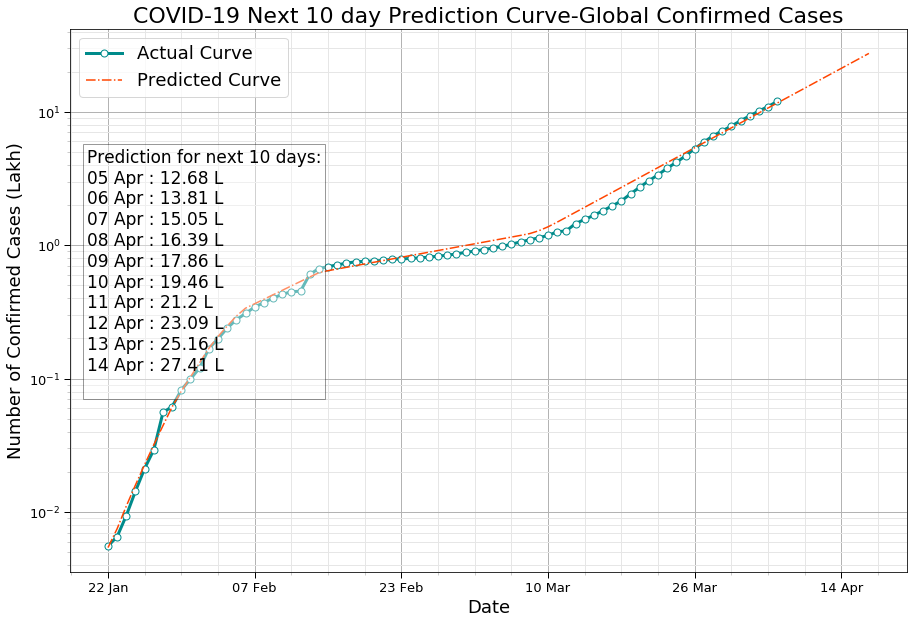

In [98]:
lakh = 100000
prediction_days = 10
data = np.power(10,model.predict(np.arange(1,len(data_y)+prediction_days+1)))
temp_data = df_confirmed.iloc[:,5:].sum(axis =0)
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data/lakh,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/lakh,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),d[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve-Global Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Confirmed Cases (Lakh)",fontsize =18)

plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
plt.savefig(out+"Prediction Curve-Confirmed.png")
plt.show()

## Prediction Curve for Global Death Cases
Buliding Model

In [99]:
Visible = Input(shape=(1,))
Dense_l1 = Dense(80,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)
Dense_l2 = Dense(80,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)
Dense_l3 = Dense(1,name="Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "Output")(Dense_l3)
model2 = models.Model(inputs=Visible, outputs=LRelu_l3)
model2.compile(optimizer=Adam(lr=0.0001), 
              loss='mean_squared_error',
              metrics=['accuracy'])
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 1)                 81        
_________________________________________________________________
Output (LeakyReLU)           (None, 1)                 0   

In [100]:
data1_y = np.log10(np.asarray(df_deaths.sum()[5:-1]).astype("float32"))
data1_x = np.arange(1,len(data_y))

In [101]:
epochs=2000
model2.fit(data1_x.reshape([data1_y.shape[0],1]),data1_y.reshape([data1_y.shape[0],1]),epochs=epochs)

Train on 73 samples
Epoch 1/2000
73/73 [==============================] - 0s 7ms/sample - loss: 5.6161 - accuracy: 0.0000e+00
Epoch 2/2000
73/73 [==============================] - 0s 280us/sample - loss: 2.7887 - accuracy: 0.0000e+00
Epoch 3/2000
73/73 [==============================] - 0s 330us/sample - loss: 1.3213 - accuracy: 0.0000e+00
Epoch 4/2000
73/73 [==============================] - 0s 241us/sample - loss: 0.9476 - accuracy: 0.0000e+00
Epoch 5/2000
73/73 [==============================] - 0s 158us/sample - loss: 1.2927 - accuracy: 0.0000e+00
Epoch 6/2000
73/73 [==============================] - 0s 249us/sample - loss: 1.4894 - accuracy: 0.0000e+00
Epoch 7/2000
73/73 [==============================] - 0s 169us/sample - loss: 1.4359 - accuracy: 0.0000e+00
Epoch 8/2000
73/73 [==============================] - 0s 163us/sample - loss: 1.2249 - accuracy: 0.0000e+00
Epoch 9/2000
73/73 [==============================] - 0s 261us/sample - loss: 1.0538 - accuracy: 0.0000e+00
Epoch 10/2

73/73 [==============================] - 0s 155us/sample - loss: 0.6110 - accuracy: 0.0000e+00
Epoch 150/2000
73/73 [==============================] - 0s 189us/sample - loss: 0.6082 - accuracy: 0.0000e+00
Epoch 151/2000
73/73 [==============================] - 0s 189us/sample - loss: 0.6055 - accuracy: 0.0000e+00
Epoch 152/2000
73/73 [==============================] - 0s 174us/sample - loss: 0.5989 - accuracy: 0.0000e+00
Epoch 153/2000
73/73 [==============================] - 0s 265us/sample - loss: 0.6143 - accuracy: 0.0000e+00
Epoch 154/2000
73/73 [==============================] - 0s 398us/sample - loss: 0.6028 - accuracy: 0.0000e+00
Epoch 155/2000
73/73 [==============================] - 0s 444us/sample - loss: 0.5980 - accuracy: 0.0000e+00
Epoch 156/2000
73/73 [==============================] - 0s 433us/sample - loss: 0.5957 - accuracy: 0.0000e+00
Epoch 157/2000
73/73 [==============================] - 0s 241us/sample - loss: 0.5911 - accuracy: 0.0000e+00
Epoch 158/2000
73/73 [===

73/73 [==============================] - 0s 196us/sample - loss: 0.2687 - accuracy: 0.0000e+00
Epoch 297/2000
73/73 [==============================] - 0s 344us/sample - loss: 0.2671 - accuracy: 0.0000e+00
Epoch 298/2000
73/73 [==============================] - ETA: 0s - loss: 0.2293 - accuracy: 0.0000e+ - 0s 211us/sample - loss: 0.2647 - accuracy: 0.0000e+00
Epoch 299/2000
73/73 [==============================] - 0s 324us/sample - loss: 0.2658 - accuracy: 0.0000e+00
Epoch 300/2000
73/73 [==============================] - 0s 220us/sample - loss: 0.2656 - accuracy: 0.0000e+00
Epoch 301/2000
73/73 [==============================] - 0s 190us/sample - loss: 0.2618 - accuracy: 0.0000e+00
Epoch 302/2000
73/73 [==============================] - 0s 152us/sample - loss: 0.2578 - accuracy: 0.0000e+00
Epoch 303/2000
73/73 [==============================] - 0s 138us/sample - loss: 0.2570 - accuracy: 0.0000e+00
Epoch 304/2000
73/73 [==============================] - 0s 179us/sample - loss: 0.2565 - 

73/73 [==============================] - 0s 145us/sample - loss: 0.0898 - accuracy: 0.0000e+00
Epoch 445/2000
73/73 [==============================] - 0s 272us/sample - loss: 0.0905 - accuracy: 0.0000e+00
Epoch 446/2000
73/73 [==============================] - 0s 118us/sample - loss: 0.0902 - accuracy: 0.0000e+00
Epoch 447/2000
73/73 [==============================] - 0s 167us/sample - loss: 0.0862 - accuracy: 0.0000e+00
Epoch 448/2000
73/73 [==============================] - ETA: 0s - loss: 0.0920 - accuracy: 0.0000e+ - 0s 242us/sample - loss: 0.0904 - accuracy: 0.0000e+00
Epoch 449/2000
73/73 [==============================] - 0s 183us/sample - loss: 0.0910 - accuracy: 0.0000e+00
Epoch 450/2000
73/73 [==============================] - 0s 240us/sample - loss: 0.0913 - accuracy: 0.0000e+00
Epoch 451/2000
73/73 [==============================] - 0s 207us/sample - loss: 0.0872 - accuracy: 0.0000e+00
Epoch 452/2000
73/73 [==============================] - 0s 96us/sample - loss: 0.0872 - a

73/73 [==============================] - 0s 355us/sample - loss: 0.0566 - accuracy: 0.0000e+00
Epoch 592/2000
73/73 [==============================] - ETA: 0s - loss: 0.0464 - accuracy: 0.0000e+ - 0s 344us/sample - loss: 0.0545 - accuracy: 0.0000e+00
Epoch 593/2000
73/73 [==============================] - 0s 374us/sample - loss: 0.0548 - accuracy: 0.0000e+00
Epoch 594/2000
73/73 [==============================] - 0s 177us/sample - loss: 0.0551 - accuracy: 0.0000e+00
Epoch 595/2000
73/73 [==============================] - 0s 230us/sample - loss: 0.0541 - accuracy: 0.0000e+00
Epoch 596/2000
73/73 [==============================] - 0s 296us/sample - loss: 0.0549 - accuracy: 0.0000e+00
Epoch 597/2000
73/73 [==============================] - 0s 296us/sample - loss: 0.0550 - accuracy: 0.0000e+00
Epoch 598/2000
73/73 [==============================] - 0s 280us/sample - loss: 0.0537 - accuracy: 0.0000e+00
Epoch 599/2000
73/73 [==============================] - 0s 267us/sample - loss: 0.0538 - 

73/73 [==============================] - 0s 238us/sample - loss: 0.0520 - accuracy: 0.0000e+00
Epoch 738/2000
73/73 [==============================] - 0s 186us/sample - loss: 0.0517 - accuracy: 0.0000e+00
Epoch 739/2000
73/73 [==============================] - 0s 171us/sample - loss: 0.0507 - accuracy: 0.0000e+00
Epoch 740/2000
73/73 [==============================] - 0s 234us/sample - loss: 0.0537 - accuracy: 0.0000e+00
Epoch 741/2000
73/73 [==============================] - 0s 178us/sample - loss: 0.0526 - accuracy: 0.0000e+00
Epoch 742/2000
73/73 [==============================] - 0s 180us/sample - loss: 0.0499 - accuracy: 0.0000e+00
Epoch 743/2000
73/73 [==============================] - 0s 172us/sample - loss: 0.0541 - accuracy: 0.0000e+00
Epoch 744/2000
73/73 [==============================] - 0s 190us/sample - loss: 0.0523 - accuracy: 0.0000e+00
Epoch 745/2000
73/73 [==============================] - 0s 307us/sample - loss: 0.0498 - accuracy: 0.0000e+00
Epoch 746/2000
73/73 [===

73/73 [==============================] - 0s 264us/sample - loss: 0.0488 - accuracy: 0.0000e+00
Epoch 883/2000
73/73 [==============================] - 0s 253us/sample - loss: 0.0488 - accuracy: 0.0000e+00
Epoch 884/2000
73/73 [==============================] - 0s 272us/sample - loss: 0.0479 - accuracy: 0.0000e+00
Epoch 885/2000
73/73 [==============================] - 0s 211us/sample - loss: 0.0472 - accuracy: 0.0000e+00
Epoch 886/2000
73/73 [==============================] - 0s 208us/sample - loss: 0.0480 - accuracy: 0.0000e+00
Epoch 887/2000
73/73 [==============================] - 0s 187us/sample - loss: 0.0477 - accuracy: 0.0000e+00
Epoch 888/2000
73/73 [==============================] - 0s 285us/sample - loss: 0.0477 - accuracy: 0.0000e+00
Epoch 889/2000
73/73 [==============================] - 0s 242us/sample - loss: 0.0475 - accuracy: 0.0000e+00
Epoch 890/2000
73/73 [==============================] - 0s 218us/sample - loss: 0.0478 - accuracy: 0.0000e+00
Epoch 891/2000
73/73 [===

73/73 [==============================] - 0s 247us/sample - loss: 0.0449 - accuracy: 0.0000e+00
Epoch 1029/2000
73/73 [==============================] - 0s 322us/sample - loss: 0.0447 - accuracy: 0.0000e+00
Epoch 1030/2000
73/73 [==============================] - 0s 266us/sample - loss: 0.0456 - accuracy: 0.0000e+00
Epoch 1031/2000
73/73 [==============================] - ETA: 0s - loss: 0.0397 - accuracy: 0.0000e+ - 0s 233us/sample - loss: 0.0450 - accuracy: 0.0000e+00
Epoch 1032/2000
73/73 [==============================] - 0s 281us/sample - loss: 0.0447 - accuracy: 0.0000e+00
Epoch 1033/2000
73/73 [==============================] - 0s 290us/sample - loss: 0.0458 - accuracy: 0.0000e+00
Epoch 1034/2000
73/73 [==============================] - 0s 237us/sample - loss: 0.0446 - accuracy: 0.0000e+00
Epoch 1035/2000
73/73 [==============================] - 0s 218us/sample - loss: 0.0460 - accuracy: 0.0000e+00
Epoch 1036/2000
73/73 [==============================] - 0s 365us/sample - loss: 0

73/73 [==============================] - 0s 257us/sample - loss: 0.0464 - accuracy: 0.0000e+00
Epoch 1174/2000
73/73 [==============================] - 0s 268us/sample - loss: 0.0429 - accuracy: 0.0000e+00
Epoch 1175/2000
73/73 [==============================] - 0s 306us/sample - loss: 0.0410 - accuracy: 0.0000e+00
Epoch 1176/2000
73/73 [==============================] - 0s 182us/sample - loss: 0.0435 - accuracy: 0.0000e+00
Epoch 1177/2000
73/73 [==============================] - 0s 242us/sample - loss: 0.0464 - accuracy: 0.0000e+00
Epoch 1178/2000
73/73 [==============================] - 0s 299us/sample - loss: 0.0424 - accuracy: 0.0000e+00
Epoch 1179/2000
73/73 [==============================] - 0s 332us/sample - loss: 0.0429 - accuracy: 0.0000e+00
Epoch 1180/2000
73/73 [==============================] - 0s 259us/sample - loss: 0.0439 - accuracy: 0.0000e+00
Epoch 1181/2000
73/73 [==============================] - 0s 135us/sample - loss: 0.0411 - accuracy: 0.0000e+00
Epoch 1182/2000
7

Epoch 1320/2000
73/73 [==============================] - 0s 143us/sample - loss: 0.0365 - accuracy: 0.0000e+00
Epoch 1321/2000
73/73 [==============================] - 0s 194us/sample - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 1322/2000
73/73 [==============================] - 0s 161us/sample - loss: 0.0385 - accuracy: 0.0000e+00
Epoch 1323/2000
73/73 [==============================] - 0s 165us/sample - loss: 0.0362 - accuracy: 0.0000e+00
Epoch 1324/2000
73/73 [==============================] - 0s 185us/sample - loss: 0.0371 - accuracy: 0.0000e+00
Epoch 1325/2000
73/73 [==============================] - 0s 144us/sample - loss: 0.0361 - accuracy: 0.0000e+00
Epoch 1326/2000
73/73 [==============================] - 0s 173us/sample - loss: 0.0363 - accuracy: 0.0000e+00
Epoch 1327/2000
73/73 [==============================] - 0s 166us/sample - loss: 0.0366 - accuracy: 0.0000e+00
Epoch 1328/2000
73/73 [==============================] - 0s 231us/sample - loss: 0.0390 - accuracy: 0.0000e+00
E

73/73 [==============================] - 0s 315us/sample - loss: 0.0324 - accuracy: 0.0000e+00
Epoch 1466/2000
73/73 [==============================] - 0s 277us/sample - loss: 0.0333 - accuracy: 0.0000e+00
Epoch 1467/2000
73/73 [==============================] - 0s 217us/sample - loss: 0.0319 - accuracy: 0.0000e+00
Epoch 1468/2000
73/73 [==============================] - 0s 267us/sample - loss: 0.0361 - accuracy: 0.0000e+00
Epoch 1469/2000
73/73 [==============================] - 0s 308us/sample - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 1470/2000
73/73 [==============================] - 0s 440us/sample - loss: 0.0318 - accuracy: 0.0000e+00
Epoch 1471/2000
73/73 [==============================] - 0s 171us/sample - loss: 0.0312 - accuracy: 0.0000e+00
Epoch 1472/2000
73/73 [==============================] - 0s 138us/sample - loss: 0.0312 - accuracy: 0.0000e+00
Epoch 1473/2000
73/73 [==============================] - 0s 223us/sample - loss: 0.0311 - accuracy: 0.0000e+00
Epoch 1474/2000
7

Epoch 1539/2000
73/73 [==============================] - 0s 204us/sample - loss: 0.0295 - accuracy: 0.0000e+00
Epoch 1540/2000
73/73 [==============================] - 0s 203us/sample - loss: 0.0317 - accuracy: 0.0000e+00
Epoch 1541/2000
73/73 [==============================] - 0s 236us/sample - loss: 0.0311 - accuracy: 0.0000e+00
Epoch 1542/2000
73/73 [==============================] - 0s 421us/sample - loss: 0.0334 - accuracy: 0.0000e+00
Epoch 1543/2000
73/73 [==============================] - 0s 231us/sample - loss: 0.0305 - accuracy: 0.0000e+00
Epoch 1544/2000
73/73 [==============================] - 0s 190us/sample - loss: 0.0292 - accuracy: 0.0000e+00
Epoch 1545/2000
73/73 [==============================] - 0s 204us/sample - loss: 0.0319 - accuracy: 0.0000e+00
Epoch 1546/2000
73/73 [==============================] - 0s 191us/sample - loss: 0.0368 - accuracy: 0.0000e+00
Epoch 1547/2000
73/73 [==============================] - 0s 294us/sample - loss: 0.0303 - accuracy: 0.0000e+00
E

Epoch 1612/2000
73/73 [==============================] - 0s 225us/sample - loss: 0.0265 - accuracy: 0.0000e+00
Epoch 1613/2000
73/73 [==============================] - 0s 190us/sample - loss: 0.0276 - accuracy: 0.0000e+00
Epoch 1614/2000
73/73 [==============================] - 0s 241us/sample - loss: 0.0287 - accuracy: 0.0000e+00
Epoch 1615/2000
73/73 [==============================] - 0s 321us/sample - loss: 0.0270 - accuracy: 0.0000e+00
Epoch 1616/2000
73/73 [==============================] - 0s 296us/sample - loss: 0.0271 - accuracy: 0.0000e+00
Epoch 1617/2000
73/73 [==============================] - 0s 263us/sample - loss: 0.0266 - accuracy: 0.0000e+00
Epoch 1618/2000
73/73 [==============================] - 0s 363us/sample - loss: 0.0263 - accuracy: 0.0000e+00
Epoch 1619/2000
73/73 [==============================] - 0s 144us/sample - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 1620/2000
73/73 [==============================] - 0s 268us/sample - loss: 0.0259 - accuracy: 0.0000e+00
E

73/73 [==============================] - 0s 293us/sample - loss: 0.0236 - accuracy: 0.0000e+00
Epoch 1759/2000
73/73 [==============================] - 0s 257us/sample - loss: 0.0236 - accuracy: 0.0000e+00
Epoch 1760/2000
73/73 [==============================] - 0s 294us/sample - loss: 0.0227 - accuracy: 0.0000e+00
Epoch 1761/2000
73/73 [==============================] - 0s 337us/sample - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 1762/2000
73/73 [==============================] - 0s 382us/sample - loss: 0.0239 - accuracy: 0.0000e+00
Epoch 1763/2000
73/73 [==============================] - 0s 175us/sample - loss: 0.0258 - accuracy: 0.0000e+00
Epoch 1764/2000
73/73 [==============================] - 0s 327us/sample - loss: 0.0249 - accuracy: 0.0000e+00
Epoch 1765/2000
73/73 [==============================] - 0s 232us/sample - loss: 0.0245 - accuracy: 0.0000e+00
Epoch 1766/2000
73/73 [==============================] - 0s 218us/sample - loss: 0.0245 - accuracy: 0.0000e+00
Epoch 1767/2000
7

Epoch 1832/2000
73/73 [==============================] - 0s 702us/sample - loss: 0.0206 - accuracy: 0.0000e+00
Epoch 1833/2000
73/73 [==============================] - 0s 823us/sample - loss: 0.0217 - accuracy: 0.0000e+00
Epoch 1834/2000
73/73 [==============================] - 0s 359us/sample - loss: 0.0231 - accuracy: 0.0000e+00
Epoch 1835/2000
73/73 [==============================] - 0s 372us/sample - loss: 0.0213 - accuracy: 0.0000e+00
Epoch 1836/2000
73/73 [==============================] - 0s 295us/sample - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 1837/2000
73/73 [==============================] - 0s 240us/sample - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 1838/2000
73/73 [==============================] - 0s 287us/sample - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 1839/2000
73/73 [==============================] - 0s 346us/sample - loss: 0.0213 - accuracy: 0.0000e+00
Epoch 1840/2000
73/73 [==============================] - 0s 240us/sample - loss: 0.0245 - accuracy: 0.0000e+00
E

Epoch 1905/2000
73/73 [==============================] - 0s 231us/sample - loss: 0.0191 - accuracy: 0.0000e+00
Epoch 1906/2000
73/73 [==============================] - 0s 321us/sample - loss: 0.0193 - accuracy: 0.0000e+00
Epoch 1907/2000
73/73 [==============================] - 0s 210us/sample - loss: 0.0190 - accuracy: 0.0000e+00
Epoch 1908/2000
73/73 [==============================] - 0s 205us/sample - loss: 0.0195 - accuracy: 0.0000e+00
Epoch 1909/2000
73/73 [==============================] - 0s 212us/sample - loss: 0.0189 - accuracy: 0.0000e+00
Epoch 1910/2000
73/73 [==============================] - 0s 319us/sample - loss: 0.0193 - accuracy: 0.0000e+00
Epoch 1911/2000
73/73 [==============================] - 0s 201us/sample - loss: 0.0198 - accuracy: 0.0000e+00
Epoch 1912/2000
73/73 [==============================] - 0s 255us/sample - loss: 0.0207 - accuracy: 0.0000e+00
Epoch 1913/2000
73/73 [==============================] - 0s 136us/sample - loss: 0.0190 - accuracy: 0.0000e+00
E

In [102]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 1)                 81        
_________________________________________________________________
Output (LeakyReLU)           (None, 1)                 0   

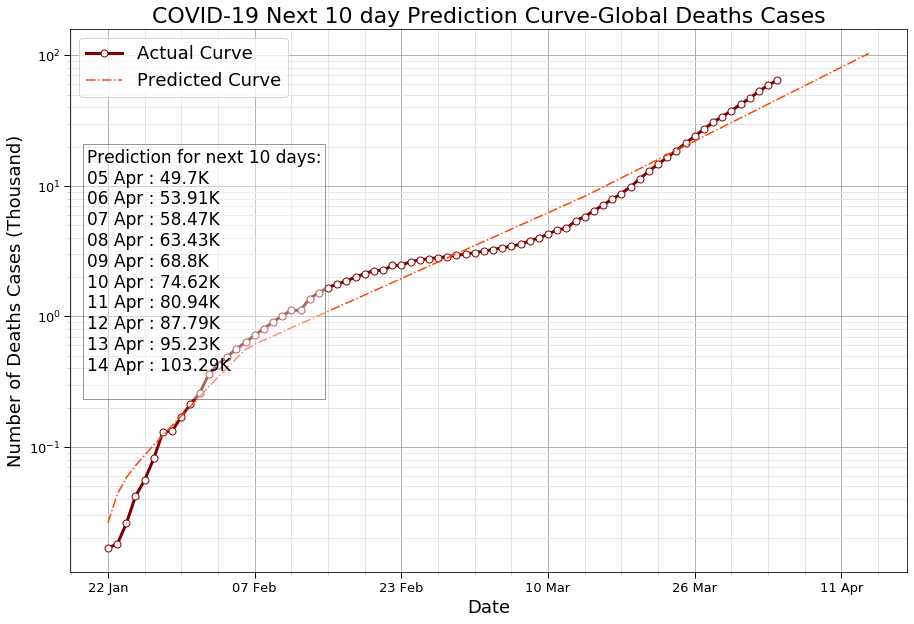

In [103]:
thousand = 1000
prediction_days = 10
data = np.power(10,model2.predict(np.arange(1,len(data_y)+prediction_days+1)))
temp_data = df_deaths.iloc[:,5:].sum(axis =0)
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)


date = np.arange(0,len(temp_data))
# xnew = np.linspace(date.min(), date.max(), 10)
# spl = make_interp_spline(date, t, k=1)  # type: BSpline
# power_smooth = spl(xnew)

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data/thousand,"-.",color="maroon",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/thousand,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-1)[0]/thousand)+"K\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=12)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve-Global Deaths Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Deaths Cases (Thousand)",fontsize =18)

plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
plt.savefig(out+"Prediction Curve2.png")
plt.show()

In [104]:
start_date = "3/24/20"
sd= dd(start_date,"1/22/20")
nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays
data_confirmed = np.power(10,model.predict(np.arange(1,len(data_y)+prediction_days+1)))
data_deaths = np.power(10,model2.predict(np.arange(1,len(data_y)+prediction_days+1)))
pd.DataFrame([total[sd:],
              list(np.int64(np.round(data_confirmed[sd:].reshape(-1)/lakh,2)*lakh)),
              list(df_confirmed.iloc[:,5:].sum(axis =0)[sd:]),
              list(np.int64(np.round(data_deaths[sd:].reshape(-1)/thousand,2)*thousand)),
             list(df_deaths.iloc[:,5:].sum(axis =0)[sd:])],
             ["Date","Confirmed(Predicted)","Confirmed(Actual)","Deaths(Predicted)","Deaths(Actual)"]
            ).transpose().set_index("Date")

Confirmed(Predicted) Confirmed(Actual) Deaths(Predicted) Deaths(Actual)
Date                                                                          
24 Mar               454000            418045             18740          18625
25 Mar               494000            467653             20330          21181
26 Mar               538000            529591             22050          23970
27 Mar               586000            593291             23910          27198
28 Mar               639000            660706             25940          30652
29 Mar               696000            720117             28140          33925
30 Mar               758000            782365             30520          37582
31 Mar               826000            857487             33100          42107
01 Apr               900000            932605             35910          46809
02 Apr               981000           1013157             38950          52983
03 Apr              1068000           1095917             42240          58787
04 Apr              1164000           1197405             45820          64606
05 Apr              1268000              None             49700           None
06 Apr              1381000              None             53910           None
07 Apr              1505000              None             58470           None
08 Apr              1639000              None             63430           None
09 Apr              1786000              None             68800           None
10 Apr              1946000              None             74620           None
11 Apr              2120000              None             80940           None
12 Apr              2309000              None             87790           None
13 Apr              2516000              None             95230           None
14 Apr              2741000              None            103290           None